In [1]:
import cv2
import PIL
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [8]:
def mostrar_arquivos(path):
    x = 0
    for p, _, files in os.walk(os.path.abspath(path)):
        for file in files:
            print(file)
            x += 1

        if x == 10:
            break

In [9]:
mostrar_arquivos(r'C:\Users\rodrigo.cabral\PycharmProjects\TCC-CienciaDados\Imagens\400x_treino')

A1.png
A10.png
A11.png
A12.png
A13.png
A14.png
A15.png
A16.png
A17.png
A18.png
A19.png
A2.png
A20.png
A21.png
A22.png
A23.png
A24.png
A25.png
A26.png
A27.png
A28.png
A29.png
A3.png
A30.png
A31.png
A32.png
A33.png
A34.png
A35.png
A36.png
A37.png
A38.png
A39.png
A4.png
A40.png
A41.png
A42.png
A43.png
A44.png
A45.png
A46.png
A5.png
A6.png
A7.png
A8.png
A9.png
DCI1687.jpg
DCI1688.jpg
DCI1689.jpg
DCI1690.jpg
DCI1691.jpg
DCI1692.jpg
DCI1693.jpg
DCI1694.jpg
DCI1695.jpg
DCI1696.jpg
DCI1697.jpg
DCI1698.jpg
DCI1699.jpg
DCI1700.jpg
DCI1701.jpg
DCI1702.jpg
DCI1703.jpg
DCI1704.jpg
DCI1705.jpg
DCI1706.jpg
DCI1707.jpg
DCI1708.jpg
DCI1709.jpg
DCI1710.jpg
DCI1711.jpg
DCI1712.jpg
DCI1713.jpg
DCI1714.jpg
DCI1715.jpg
DCI1716.jpg
DCI1717.jpg
DCI1718.jpg
DCI1719.jpg
DCI1720.jpg
DCI1721.jpg
DCI1722.jpg
DCI1723.jpg
DCI1724.jpg
DCI1725.jpg
DCI1726.jpg
DCI1727.jpg
DCI1728.jpg
DCI1729.jpg
DCI1730.jpg
DCI1731.jpg
DCI1732.jpg
DCI1733.jpg
DCI1734.jpg
DCI1735.jpg
DCI1736.jpg
DCI1737.jpg
DCI1738.jpg
DCI1739.jpg
DCI17

In [2]:
def montar_nome(path):
    nome_file = []
    file_path = []
    x = 0
    for p, _, files in os.walk(os.path.abspath(path)):
        for file in files:
            nome_file.append(file)
            file_path.append(p+'//'+file)
    return nome_file, file_path

def selecionar_classe(nomes):
    classe = []
    for nome in nomes:
        if re.match(r"TA[0-9].{1,5}", nome) != None:
            classe.append('TA')
        elif re.match(r"DCI[0-9].{1,5}", nome) != None:
            classe.append('DCI')
        elif re.match(r"F[0-9].{1,5}", nome) != None:
            classe.append('F')
        elif re.match(r"PT[0-9].{1,5}", nome) != None:
            classe.append('PT')
        elif re.match(r"DC[0-9].{1,5}", nome) != None:
            classe.append('DC')
        elif re.match(r"LC[0-9].{1,5}", nome) != None:
            classe.append('LC')
        elif re.match(r"MC[0-9].{1,5}", nome) != None:
            classe.append('MC')
        elif re.match(r"PC[0-9].{1,5}", nome) != None:
            classe.append('PC')
        elif 'TA' not in nome:
            classe.append('A')
    return classe

def pegar_tipos(file_path):
    tipo = []
    for path in file_path:
        if 'B' in path:
            tipo.append('B')
        if 'M' in path:
            tipo.append('M')
    return tipo

def pegar_ampliacao(file_path):
    ampliacao = []
    for path in file_path:
        if '40x' in path:
            ampliacao.append('40x')
        elif '100x' in path:
            ampliacao.append('100x')
        elif '200x' in path:
            ampliacao.append('200x')
        elif '400x' in path:
            ampliacao.append('400x')
    return ampliacao

def pegar_origem(file_path):
    origem = []
    for path in file_path:
        if 'treino' in path:
            origem.append('Te')
        elif 'Teste' in path:
            origem.append('Tr')
    return origem

In [3]:
def montar_data_frame(path):
    nome_file, file_path = montar_nome(path)
    classes = selecionar_classe(nome_file)
    tipos = pegar_tipos(file_path)
    ampliacaos = pegar_ampliacao(file_path)
    origem = pegar_origem(file_path)
    data = {'FikePath': file_path, 'Type': tipos, 'class':classes,'Magnification':ampliacaos, 'DataSet':origem}
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df.transpose()
    return df

In [4]:
df_teste =  montar_data_frame(r'C:\Users\rodrigo.cabral\PycharmProjects\TCC-CienciaDados\Imagens')
df_teste.head(10)

,FikePath,Type,class,Magnification,DataSet
0,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
1,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
2,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
3,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
4,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
5,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
6,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
7,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
8,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
9,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr


In [117]:
tuple(df_teste['Type'].unique())

('B', 'M')

In [75]:
df_teste['class'].unique()

array(['A', 'DCI', 'F', 'PT', 'TA', 'DC', 'LC', 'MC', 'PC'], dtype=object)

In [76]:
df_teste['Magnification'].unique()

array(['100x', '200x', '400x', '40x'], dtype=object)

In [77]:
df_teste['DataSet'].unique()

array(['Tr', 'Te'], dtype=object)

In [78]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7681 entries, 0 to 7680
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FikePath       7681 non-null   object
 1   Type           7681 non-null   object
 2   class          7681 non-null   object
 3   Magnification  7681 non-null   object
 4   DataSet        7681 non-null   object
dtypes: object(5)
memory usage: 300.2+ KB


In [10]:
df_teste.isnull().sum()

FikePath         0
Type             0
class            0
Magnification    0
DataSet          0
dtype: int64

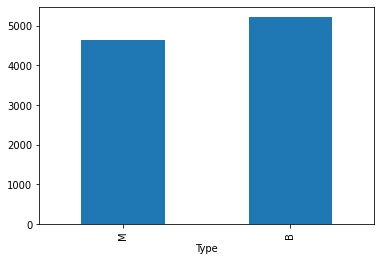

In [11]:
df_teste.groupby(['Type']).Type.count().sort_values().plot(kind='bar');

AttributeError: 'FacetGrid' object has no attribute 'set_xticklabelse'

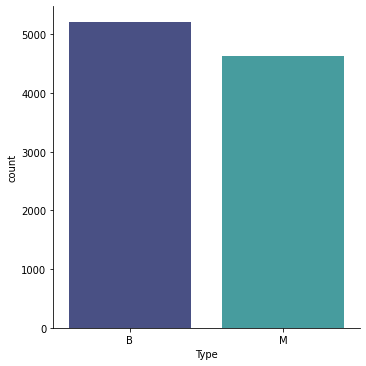

In [55]:
bar = sns.catplot(x="Type", kind="count", palette="mako", data=df_teste)
bar.set_xticklabelse(['Maligno','Benigno'])

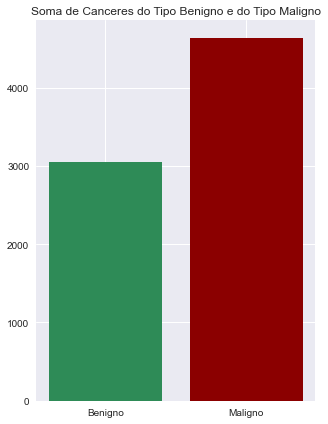

In [115]:
x=[1,2]
plt.figure(figsize=(5,7))
plt.title('Soma de Canceres do Tipo Benigno e do Tipo Maligno')
plt.bar(x,height=[df_teste[df_teste['Type'] == 'B'].count().Type,df_teste[df_teste['Type'] == 'M'].count().Type],color=cores_grafico )
plt.xticks(x, ('Benigno','Maligno'))
plt.show()

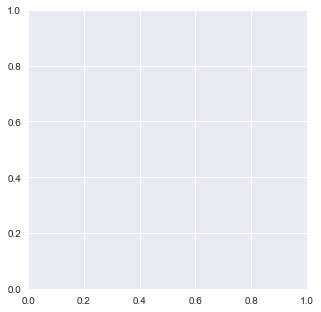

In [94]:
def gerar_porcentagem(pct,allvals):
    absolute = int*(pct/100*np.sum(allvals))
    return f"{pct}%\n ({absolute})"


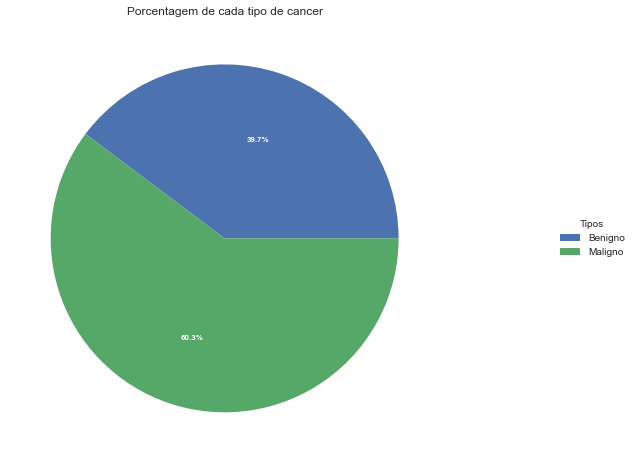

In [106]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
tipo =['Benigno','Maligno']
data = [df_teste[df_teste['Type'] == 'B'].count().Type,df_teste[df_teste['Type'] == 'M'].count().Type]

wedges, texts, autotexts = ax.pie(data,autopct='%0.1f%%',textprops=dict(color='w'))
ax.legend(wedges,
          tipo,
          title="Tipos",
          loc='center left',
          bbox_to_anchor=(1.25, 0, 0.5, 1))

plt.setp(autotexts,size=8, weight="bold")
ax.set_title('Porcentagem de cada tipo de cancer')
plt.show()

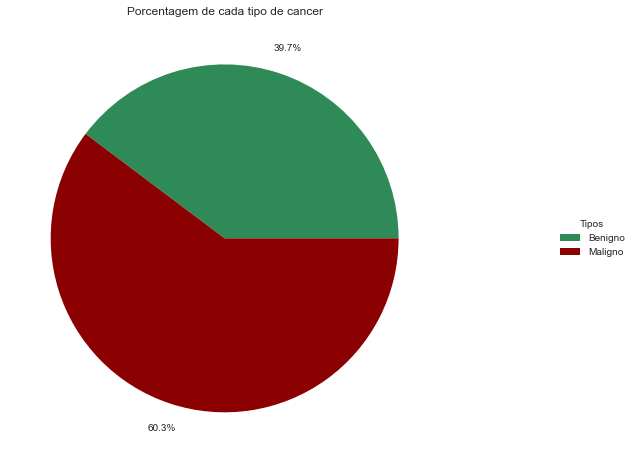

In [112]:
legenda = ['Benigno', 'Maligno']
gastos_mensais = [df_teste[df_teste['Type'] == 'B'].count().Type,df_teste[df_teste['Type'] == 'M'].count().Type]
cores_grafico = ['#2E8B57', '#8B0000']
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(gastos_mensais, autopct='%0.1f%%', pctdistance=1.15, colors=cores_grafico)
ax.legend(legenda, title="Tipos", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Porcentagem de cada tipo de cancer")
plt.show()

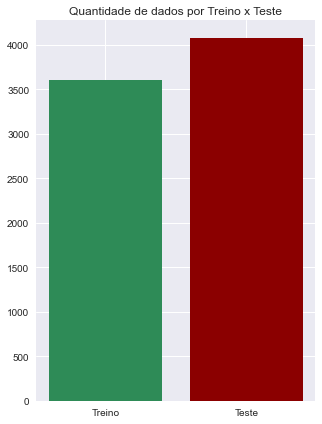

In [119]:
x=[1,2]
plt.figure(figsize=(5,7))
plt.title('Quantidade de dados por Treino x Teste')
plt.bar(x,height=[df_teste[df_teste['DataSet'] == 'Tr'].count().Type,df_teste[df_teste['DataSet'] == 'Te'].count().Type],color=cores_grafico )
plt.xticks(x, ('Treino','Teste'))
plt.show()

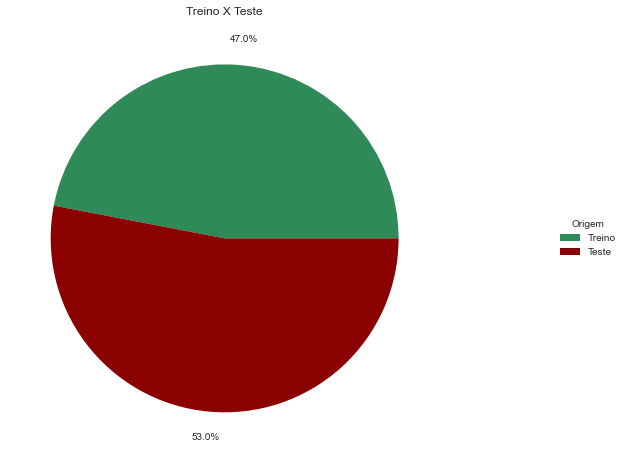

In [121]:
legenda = ['Treino','Teste']
gastos_mensais = [df_teste[df_teste['DataSet'] == 'Tr'].count().Type,df_teste[df_teste['DataSet'] == 'Te'].count().Type]
cores_grafico = ['#2E8B57', '#8B0000']
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(gastos_mensais, autopct='%0.1f%%', pctdistance=1.15, colors=cores_grafico)
ax.legend(legenda, title="Origem", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Treino X Teste")
plt.show()

In [50]:
x100

[675, 998]

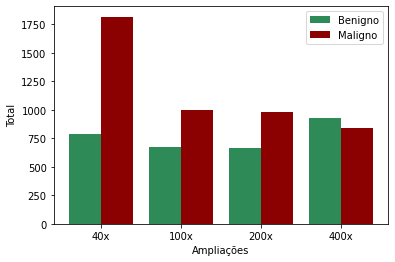

In [58]:
x = np.arange(4) 
y1 = [x40[0], x100[0],x200[0],x400[0]]
y2 = [x40[1], x100[1],x200[1],x400[1]]
width = 0.4
plt.bar(x-0.2, y1, width ,color='#2E8B57') 
plt.bar(x+0.2, y2, width, color='#8B0000') 
plt.xticks(x, [ '40x','100x', '200x', '400x']);
plt.xlabel("Ampliações")
plt.ylabel("Total") 
plt.legend([ 'Benigno','Maligno']) 
plt.show() 

In [59]:
df_teste.head(10)

,FikePath,Type,class,Magnification,DataSet
0,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
1,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
2,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
3,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
4,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
5,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
6,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
7,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
8,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr
9,C:\Users\rodrigo.cabral\PycharmProjects\TCC-Ci...,B,A,100x,Tr


In [60]:
df_teste['class'].unique()

array(['A', 'DCI', 'F', 'PT', 'TA', 'DC', 'LC', 'MC', 'PC'], dtype=object)

In [15]:

x40,x100,x200,x400 = [],[],[],[]
for ampli in [ '40x','100x', '200x', '400x']:
    for classe in list(df_teste['class'].unique()):
        if '40x' == ampli:
            x40.append(df_teste[(df_teste['Magnification'] == ampli) & (df_teste['class'] == classe)].shape[0])
        elif '100x' == ampli:
            x100.append(df_teste[(df_teste['Magnification'] == ampli) & (df_teste['class'] == classe)].shape[0])
        elif '200x' == ampli:
            x200.append(df_teste[(df_teste['Magnification'] == ampli) & (df_teste['class'] == classe)].shape[0])
        elif '400x' == ampli:
            x400.append(df_teste[(df_teste['Magnification'] == ampli) & (df_teste['class'] == classe)].shape[0])

In [106]:
valores = {'40x':x40,'100x':x100,'200x':x200,'400x':x400}
df_graf = pd.DataFrame.from_dict(valores, orient='index')
df_graf.columns =  ['A', 'DCI', 'F', 'PT', 'TA', 'DC', 'LC', 'MC', 'PC']

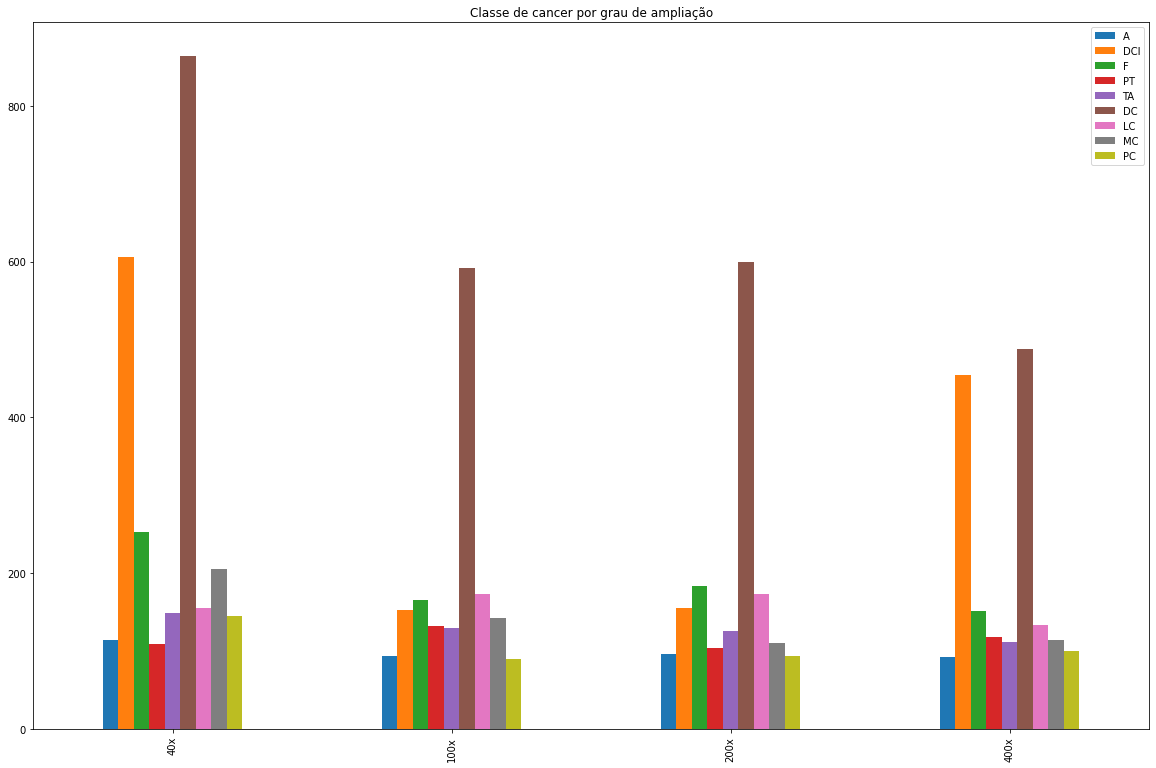

In [95]:
df_graf.plot(kind='bar',stacked=False,title='Classe de cancer por grau de ampliação',figsize=(20,13));

In [57]:
df_treino = df_teste[df_teste['DataSet'] == 'Tr']
df_test = df_teste[df_teste['DataSet'] == 'Te']

In [61]:
teste = df_test.groupby(['class']).count().FikePath

class
A       205
DC     1406
DCI     663
F       424
LC      314
MC      326
PC      240
PT      228
TA      266
Name: FikePath, dtype: int64

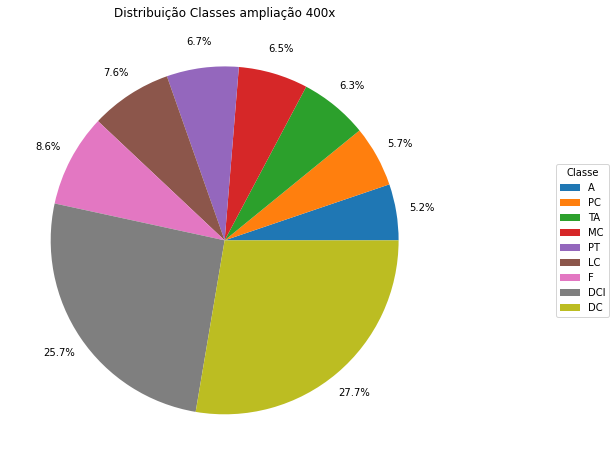

In [29]:
legenda = ['A', 'PC', 'TA', 'MC', 'PT', 'LC', 'F', 'DCI', 'DC']
gastos_mensais = x400
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(gastos_mensais, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(legenda, title="Classe", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Distribuição Classes ampliação 400x")
plt.show()

In [39]:
lista = []
for x in range(0,9):
    lista.append(df_teste.groupby(['class']).count().FikePath[x])

In [40]:
lista


[396, 2544, 1368, 755, 638, 571, 429, 463, 517]

In [52]:
teste = d.groupby(['class']).count().FikePath
teste = teste.sort_values(ascending=True)
teste = teste.to_list()

[396, 429, 463, 517, 571, 638, 755, 1368, 2544]

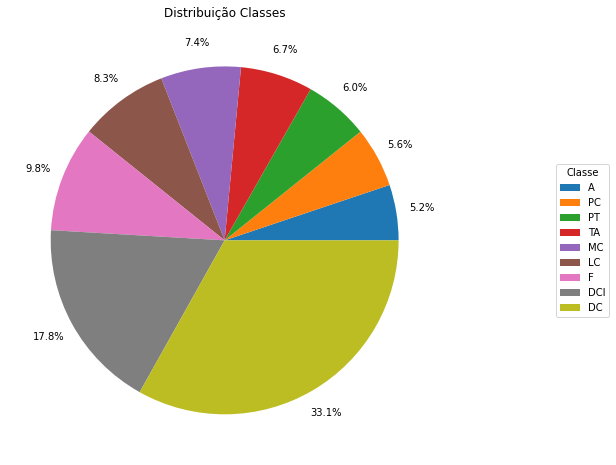

In [53]:
legenda = ['A', 'PC', 'PT', 'TA', 'MC', 'LC', 'F', 'DCI', 'DC']
gastos_mensais = teste
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(gastos_mensais, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(legenda, title="Classe", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Distribuição Classes")
plt.show()

In [91]:
df_treino = df_teste[df_teste['DataSet'] == 'Tr']
df_test = df_teste[df_teste['DataSet'] == 'Te']

In [98]:
treino = df_treino.groupby(['class']).count().FikePath
treino = treino.sort_values(ascending=True)
list(treino.index)

['PC', 'A', 'PT', 'MC', 'TA', 'LC', 'F', 'DCI', 'DC']

In [99]:
treino_lista = treino.to_list()
treino_lista

[189, 191, 235, 245, 251, 324, 331, 705, 1138]

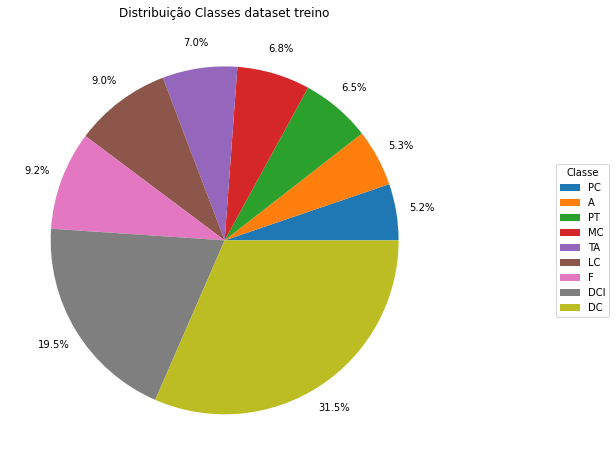

In [100]:
legenda = list(treino.index)
gastos_mensais = treino_lista
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(gastos_mensais, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(legenda, title="Classe", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Distribuição Classes dataset treino")
plt.show()

In [101]:
test = df_test.groupby(['class']).count().FikePath
test = test.sort_values(ascending=True)
list(test.index)

['A', 'PT', 'PC', 'TA', 'LC', 'MC', 'F', 'DCI', 'DC']

In [102]:
test_lista = test.to_list()
test_lista

[205, 228, 240, 266, 314, 326, 424, 663, 1406]

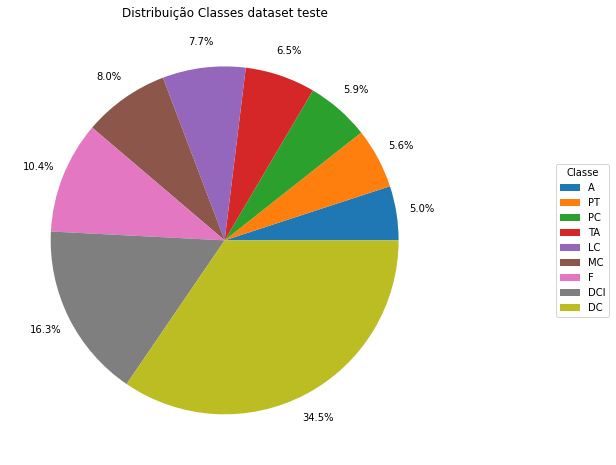

In [103]:
legenda = list(test.index)
gastos_mensais = test_lista
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(gastos_mensais, autopct='%0.1f%%', pctdistance=1.15)
ax.legend(legenda, title="Classe", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax.set_title("Distribuição Classes dataset teste")
plt.show()